In [1]:
import numpy as np 
from keras.models import Sequential 
from keras.layers import Dense 


                

In [5]:
X = np.array([[0, 0, 0], [0, 0, 1],[0, 1, 0],[0, 1, 1],[1, 0, 0],[1, 0, 1]])
y = np.array([[0],[1],[0],[1],[0],[1]])

model = Sequential() 
model.add(Dense( input_shape=(3,), units=4 , activation='relu' ))
model.add(Dense(  units=4 , activation='relu' ))
model.add(Dense(  units=1 , activation='sigmoid' ))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

model.summary()
                

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X,y,epochs=300,batch_size=2,verbose=0)

In [11]:
loss , accuracy = model.evaluate(X,y)
print(f" loss: {loss}    accuracy : {accuracy*100}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.4765
 loss: 0.47648295760154724    accuracy : 100.0


In [12]:
pred = model.predict(X)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


array([[0.2254661 ],
       [0.55192447],
       [0.06579868],
       [0.5381899 ],
       [0.47836742],
       [0.5113706 ]], dtype=float32)

In [18]:
threshold = .5 
y_pred = ( pred > threshold ).astype(int)
np.array(y_pred)


array([[0],
       [1],
       [0],
       [1],
       [0],
       [1]])

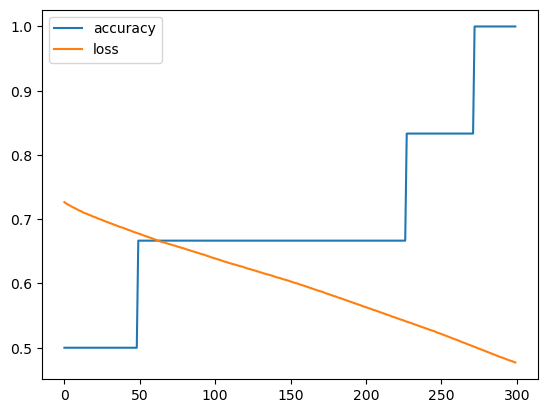

In [22]:
import matplotlib.pyplot as plt 


plt.plot(range(300),history.history['accuracy'],label="accuracy")
plt.plot(range(300),history.history['loss'],label="loss")
plt.legend()
plt.show()